In [66]:
import numpy as np
from helpers import *
import cv2
import matplotlib.pyplot as plt

In [67]:
Ftrue = np.array([[ 3.07914555e-08, -3.61883689e-06,  5.43583727e-04],
       [-4.49876682e-06, -2.24402705e-08,  1.51520136e-01],
       [ 1.95223414e-03, -1.48295604e-01, -9.77264527e-01]])
Ftrue

array([[ 3.07914555e-08, -3.61883689e-06,  5.43583727e-04],
       [-4.49876682e-06, -2.24402705e-08,  1.51520136e-01],
       [ 1.95223414e-03, -1.48295604e-01, -9.77264527e-01]])

In [68]:
data = np.load("data/qs.npy", allow_pickle=True)
data

array({'q1': array([[192.80308677, 383.84844629, 552.40550165, 395.55690526,
        416.17883753, 366.71606701, 649.12832188, 437.85457401],
       [482.655306  , 522.55261707, 373.4083753 , 550.57520093,
        157.95394133, 379.58268042, 141.20188192, 571.00584606],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]]), 'q2': array([[ 77.42041221, 254.60721249, 469.08032639, 278.08133782,
        308.0810652 , 270.86822192, 508.91666875, 288.72429284],
       [479.74166846, 521.16039433, 373.38678026, 549.34478578,
        157.66285399, 378.83939131, 138.78418921, 569.99677028],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]])},
      dtype=object)

In [69]:
q1 = np.array([[192.80308677, 383.84844629, 552.40550165, 395.55690526,
        416.17883753, 366.71606701, 649.12832188, 437.85457401],
       [482.655306  , 522.55261707, 373.4083753 , 550.57520093,
        157.95394133, 379.58268042, 141.20188192, 571.00584606],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]]).T
q2 = np.array([[ 77.42041221, 254.60721249, 469.08032639, 278.08133782,
        308.0810652 , 270.86822192, 508.91666875, 288.72429284],
       [479.74166846, 521.16039433, 373.38678026, 549.34478578,
        157.66285399, 378.83939131, 138.78418921, 569.99677028],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ]]).T
q1.shape,q2.shape
q1

array([[192.80308677, 482.655306  ,   1.        ],
       [383.84844629, 522.55261707,   1.        ],
       [552.40550165, 373.4083753 ,   1.        ],
       [395.55690526, 550.57520093,   1.        ],
       [416.17883753, 157.95394133,   1.        ],
       [366.71606701, 379.58268042,   1.        ],
       [649.12832188, 141.20188192,   1.        ],
       [437.85457401, 571.00584606,   1.        ]])

In [70]:
def normalize2d(x):
    return (x - x.mean()) / x.std()

In [71]:
Ftrue

array([[ 3.07914555e-08, -3.61883689e-06,  5.43583727e-04],
       [-4.49876682e-06, -2.24402705e-08,  1.51520136e-01],
       [ 1.95223414e-03, -1.48295604e-01, -9.77264527e-01]])

In [72]:
Bs = []
for i,(p, q) in enumerate(zip(q1, q2)):
    B = np.array([
        p[0]*q[0], p[0]*q[1], p[0], p[1]*q[0], p[1]*q[1], p[1], q[0], q[1], 1
    ])
    Bs.append(B)
U, S, V = np.linalg.svd(np.array(Bs))
Fe = V[-1].reshape(3, 3).T * -1 # why -1?
Ftrue/Fe, np.linalg.norm(Fe-Ftrue), np.linalg.norm(Fest_8point(q2,q1)-Ftrue)

(array([[1.00011889, 0.99999084, 0.99996574],
        [1.00000539, 1.00002486, 1.00000024],
        [1.00000639, 1.00000024, 0.99999999]]),
 5.6098940664854966e-08,
 0.42400811522254217)

In [73]:
Ftrue/Fest_8point(q1,q2)

array([[1.00011889, 0.99999084, 0.99996574],
       [1.00000539, 1.00002486, 1.00000024],
       [1.00000639, 1.00000024, 0.99999999]])

In [74]:
data = np.load("data/TwoImageData.npy",allow_pickle=True).item()
im1,im2,R1,R2,t1,t2,K = data['im1'] ,data["im2"] ,data["R1"] ,data["R2"] ,data["t1"] ,data["t2"] ,data["K"]

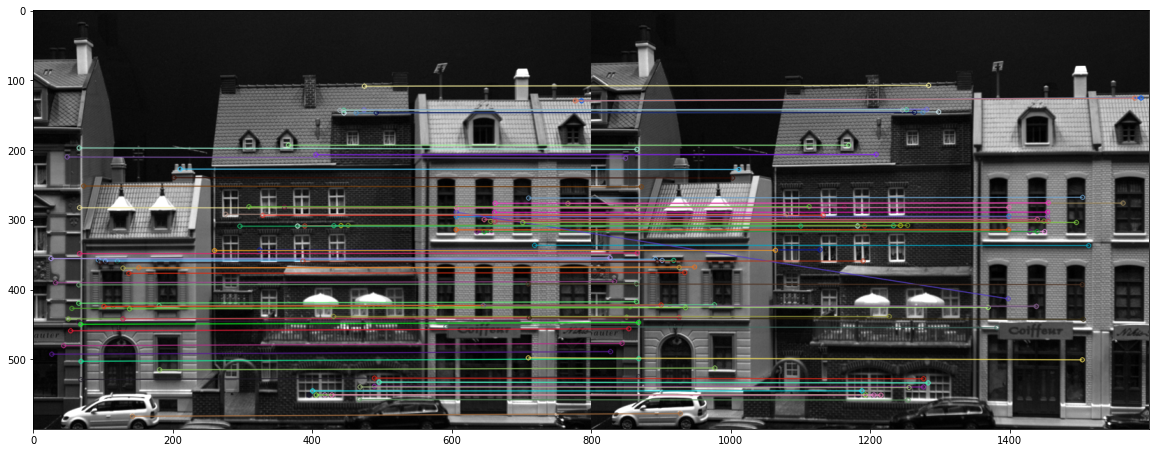

In [75]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)
bf = cv2.BFMatcher_create(crossCheck=True)
matches = bf.match(des, des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(im1,kp,im2,kp2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (20,20))
plt.imshow(img3)

In [76]:
len(kp),len(kp2)

(3749, 3628)

In [77]:
good = matches[:1000]
P1 = np.array([[kp2[m.trainIdx].pt[0],kp2[m.trainIdx].pt[1],1] for m in good])
P2 = np.array([[kp[m.queryIdx].pt[0],kp[m.queryIdx].pt[1],1] for m in good])
threshold = 3.84 * 3**2
max_inliers = 0
Fest = None
best_inlier_points = []
for i in range(100):
    choice  = np.random.choice(good, 8, replace=False)
    points1 = np.array([[kp2[m.trainIdx].pt[0],kp2[m.trainIdx].pt[1],1] for m in choice])
    points2 = np.array([[kp[m.queryIdx].pt[0],kp[m.queryIdx].pt[1],1] for m in choice])
    F = Fest_8point(points2,points1)
    inliers = 0
    inlier_points = []
    for p1,p2 in zip(P1,P2):
        sq1 = (p2 @ F)**2
        sq2 = (F @ p1.reshape(-1,1))**2
        d = (p2 @ F @ p1.reshape(-1,1))**2 / (sq1[:2].sum() + sq2[:2].sum())
        if d < threshold:
            inliers += 1
            inlier_points.append((p1,p2))
    if inliers > max_inliers:
        max_inliers = inliers
        Fest = F
        dist = (Fest*Ftrue).sum() / (np.linalg.norm(Fest)*np.linalg.norm(Ftrue))
        best_inlier_points = inlier_points
        print(dist)
max_inliers, (Fest*Ftrue).sum() / (np.linalg.norm(Fest)*np.linalg.norm(Ftrue))

0.9526880628516776
0.9957501022574256
0.9893833046978463
0.998878016773055
0.999460417378707
0.9999244760312181
0.9985670016073773
0.625771279140475
0.8027741278071584


(959, 0.8027741278071584)

In [78]:
Fest = Fest_8point(np.array(best_inlier_points)[:,1,:],np.array(best_inlier_points)[:,0,:])

In [79]:
Fest = Fest/np.linalg.norm(Fest)

In [80]:
# So this one follows dot product definition a*b = |a|*|b|*cos(th)
# if theta is close to zero this distance should be approximately 1
(Fest*Ftrue).sum() / (np.linalg.norm(Fest)*np.linalg.norm(Ftrue))

0.9997089861659744

In [81]:
np.linalg.norm(Ftrue.flatten()-Fest.flatten(),2)

0.024125249597118464